Giorgio Mendoza

RBE595-S24-S04

Monte-carlo  Programming Excercise

Calculate the optimal action value function and optimal policy using the On-policy first visit Monte-carlo.

### Setup:

First, we start by defining the environment's state space (0-5)and possible (-1 for left, 1 for right). States 0 and 5 are terminal states.

### Initializations:

### Q-values:
A table (dictionary) of Q-values is initialized for each state-action pair, which estimates the expected rewards for taking a certain action in a given state.

### Returns:
A table to store the returns (cumulative rewards) for each state-action pair across episodes.

### Policy:
An ε-soft policy is initialized, ensuring some level of randomness (exploration) in action selection but with a preference for the best-known action.

### Transition and Reward Function:
The step function models the environment's dynamics, determining the next state and reward given a current state and action. It handles the stochastic transitions and assigns rewards for reaching the charging station (state 0) or finding a can (state 5).

### Policy Execution and Learning:

The choose_action function selects an action based on the current policy's probability distribution for a given state.
The generate_episode function simulates an entire episode from a start state until a terminal state is reached, using the choose_action and step functions.

The update_policy function calculates the returns for each state-action pair encountered in the episode, updates the Q-values, and improves the policy by making it greedier with respect to the updated Q-values.

### Training Loop:
The code runs multiple episodes (100 in one loop, 10000 in another loop), updating the policy and Q-values after each episode. This iterative process is the core of the learning mechanism.

### Recording and Visualization:

The Q-values are recorded after each episode, allowing for tracking their progression over time.
The plot_Q_values function generates a plot to visually represent the evolution of Q-values, providing insights into the learning process and the convergence of the algorithm.

### Output:

The policy and Q-values are printed after the training loop to show the learned policy's probabilities and the estimated values for each action in each state.

Policy after 100 episodes:
State 0: {-1: 0.05, 1: 0.05}
State 1: {-1: 0.9500000000000001, 1: 0.05}
State 2: {-1: 0.05, 1: 0.9500000000000001}
State 3: {-1: 0.05, 1: 0.9500000000000001}
State 4: {-1: 0.05, 1: 0.9500000000000001}
State 5: {-1: 0.05, 1: 0.05}

Q-values after 100 episodes:
State 0: {-1: 0.0, 1: 0.0}
State 1: {-1: 1.0, 1: 0.0}
State 2: {-1: 0.9, 1: 4.333333333333333}
State 3: {-1: 2.7142857142857144, 1: 4.717557251908397}
State 4: {-1: 4.555555555555555, 1: 5.0}
State 5: {-1: 0.0, 1: 0.0}


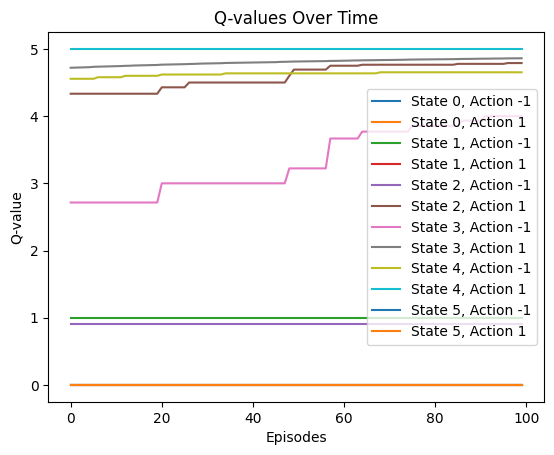

In [4]:
import random
import matplotlib.pyplot as plt


# Define the state space
states = [0, 1, 2, 3, 4, 5]

# Define the action space
actions = [-1, 1]  # -1 for left, 1 for right

# Initialize Q-values and returns
Q = {state: {action: 0.0 for action in actions} for state in states}
returns = {state: {action: [] for action in actions} for state in states}

# Set the value of epsilon for the ε-soft policy
epsilon = 0.1

# Initialize policy to an ε-soft policy
policy = {state: {action: epsilon / len(actions) for action in actions} for state in states}
for state in states:
    if state not in [0, 5]:  # No policy needed for terminal states, but we'll initialize them anyway
        best_action = random.choice(actions)
        policy[state][best_action] += (1.0 - epsilon)

# Define the transition probabilities and rewards in the step function
def step(state, action):
    if state == 0 or state == 5:
        return state, 0  # No reward for terminal states
    next_state_probabilities = {
        state + action: 0.8,
        state: 0.15,
        state - action: 0.05
    }
    next_state = random.choices(list(next_state_probabilities.keys()), weights=list(next_state_probabilities.values()), k=1)[0]
    reward = 0
    if state == 4 and action == 1 and next_state == 5:
        reward = 5
    elif state == 1 and action == -1 and next_state == 0:
        reward = 1
    return next_state, reward

# Function to choose an action based on the ε-soft policy
def choose_action(state, policy):
    action_probabilities = policy[state]
    return random.choices(list(action_probabilities.keys()), weights=list(action_probabilities.values()), k=1)[0]

# Function to generate an episode
def generate_episode(start_state, policy):
    episode = []
    state = start_state
    while state not in [0, 5]:
        action = choose_action(state, policy)
        next_state, reward = step(state, action)
        episode.append((state, action, reward))
        if next_state in [0, 5]:  # Terminal state reached
            episode.append((next_state, None, 0))  # Append terminal state
            break
        state = next_state
    return episode

# Function to update Q-values and policy
def update_policy(episode, policy, Q, returns, gamma=1.0):
    G = 0
    for state, action, reward in reversed(episode):
        if action is not None:  # Skip terminal state
            G = gamma * G + reward
            returns[state][action].append(G)
            Q[state][action] = sum(returns[state][action]) / len(returns[state][action])
    # Update policy
    for state in states:
        if state not in [0, 5]:
            best_action = max(Q[state], key=Q[state].get)
            for action in actions:
                if action == best_action:
                    policy[state][action] = 1 - epsilon + (epsilon / len(actions))
                else:
                    policy[state][action] = epsilon / len(actions)

# Run multiple episodes and update policy
for i in range(100):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

# Display the updated policy and Q-values
print("Policy after 100 episodes:")
for state in policy:
    print(f"State {state}: {policy[state]}")

print("\nQ-values after 100 episodes:")
for state in Q:
    print(f"State {state}: {Q[state]}")


# Initialize a dictionary to record Q-values at each episode for each state-action pair
Q_history = {state: {action: [] for action in actions} for state in states}

# Run multiple episodes and update policy
for i in range(100):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

    # Record the current Q-values
    for state in Q:
        for action in Q[state]:
            Q_history[state][action].append(Q[state][action])

# Function to plot Q-values
def plot_Q_values(Q_history):
    for state in Q_history:
        for action in Q_history[state]:
            plt.plot(Q_history[state][action], label=f"State {state}, Action {action}")
    plt.xlabel('Episodes')
    plt.ylabel('Q-value')
    plt.title('Q-values Over Time')
    plt.legend()
    plt.show()

# Call the function to plot Q-values
plot_Q_values(Q_history)


Over the course of 100 episodes, the algorithm is effectively learning which actions are more valuable in the given states.

The policy is being refined to be more greedy with respect to the Q-values, as it increasingly favors actions that yield higher returns.
The plot suggests that the learning process is ongoing.

While some Q-values have stabilized (notably for the most rewarding actions), others may still be in the process of being accurately estimated. This is part of the exploration-exploitation balance inherent in reinforcement learning.


Policy after 1000 episodes:
State 0: {-1: 0.05, 1: 0.05}
State 1: {-1: 0.9500000000000001, 1: 0.05}
State 2: {-1: 0.05, 1: 0.9500000000000001}
State 3: {-1: 0.05, 1: 0.9500000000000001}
State 4: {-1: 0.05, 1: 0.9500000000000001}
State 5: {-1: 0.05, 1: 0.05}

Q-values after 1000 episodes:
State 0: {-1: 0.0, 1: 0.0}
State 1: {-1: 1.375, 1: 0.0}
State 2: {-1: 1.5, 1: 4.84516129032258}
State 3: {-1: 4.435897435897436, 1: 4.94521372667068}
State 4: {-1: 4.744186046511628, 1: 5.0}
State 5: {-1: 0.0, 1: 0.0}


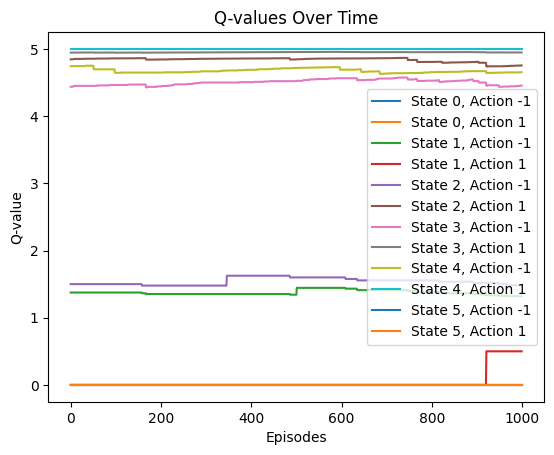

In [5]:
# Run multiple episodes and update policy
for i in range(1000):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

# Display the updated policy and Q-values
print("Policy after 1000 episodes:")
for state in policy:
    print(f"State {state}: {policy[state]}")

print("\nQ-values after 1000 episodes:")
for state in Q:
    print(f"State {state}: {Q[state]}")


# Initialize a dictionary to record Q-values at each episode for each state-action pair
Q_history = {state: {action: [] for action in actions} for state in states}

# Run multiple episodes and update policy
for i in range(1000):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

    # Record the current Q-values
    for state in Q:
        for action in Q[state]:
            Q_history[state][action].append(Q[state][action])

# Function to plot Q-values
def plot_Q_values(Q_history):
    for state in Q_history:
        for action in Q_history[state]:
            plt.plot(Q_history[state][action], label=f"State {state}, Action {action}")
    plt.xlabel('Episodes')
    plt.ylabel('Q-value')
    plt.title('Q-values Over Time')
    plt.legend()
    plt.show()

# Call the function to plot Q-values
plot_Q_values(Q_history)

After 1,000 episodes, the Monte Carlo algorithm has significantly refined the policy for the cleaning robot, with the policy becoming more deterministic in favor of actions that lead to higher rewards.

The results indicate a successful learning process, with the algorithm likely nearing an optimal policy for this particular Markov Decision Process (MDP).

Further training could be done to confirm the stability of the policy, but at this point, it may be yielding diminishing returns in terms of new information gained.

Policy after 10000 episodes:
State 0: {-1: 0.05, 1: 0.05}
State 1: {-1: 0.05, 1: 0.9500000000000001}
State 2: {-1: 0.05, 1: 0.9500000000000001}
State 3: {-1: 0.05, 1: 0.9500000000000001}
State 4: {-1: 0.05, 1: 0.9500000000000001}
State 5: {-1: 0.05, 1: 0.05}

Q-values after 10000 episodes:
State 0: {-1: 0.0, 1: 0.0}
State 1: {-1: 1.3934426229508197, 1: 4.391666666666667}
State 2: {-1: 3.514851485148515, 1: 4.893956670467503}
State 3: {-1: 4.841370558375634, 1: 4.968505338078292}
State 4: {-1: 4.663225806451613, 1: 4.997353622229573}
State 5: {-1: 0.0, 1: 0.0}


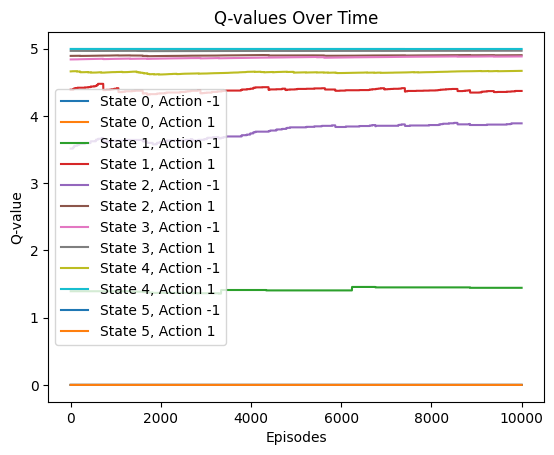

In [6]:
# Run multiple episodes and update policy
for i in range(10000):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

# Display the updated policy and Q-values
print("Policy after 10000 episodes:")
for state in policy:
    print(f"State {state}: {policy[state]}")

print("\nQ-values after 10000 episodes:")
for state in Q:
    print(f"State {state}: {Q[state]}")


# Initialize a dictionary to record Q-values at each episode for each state-action pair
Q_history = {state: {action: [] for action in actions} for state in states}

# Run multiple episodes and update policy
for i in range(10000):
    start_state = 3  # Always start from state 3
    episode = generate_episode(start_state, policy)
    update_policy(episode, policy, Q, returns)

    # Record the current Q-values
    for state in Q:
        for action in Q[state]:
            Q_history[state][action].append(Q[state][action])

# Function to plot Q-values
def plot_Q_values(Q_history):
    for state in Q_history:
        for action in Q_history[state]:
            plt.plot(Q_history[state][action], label=f"State {state}, Action {action}")
    plt.xlabel('Episodes')
    plt.ylabel('Q-value')
    plt.title('Q-values Over Time')
    plt.legend()
    plt.show()

# Call the function to plot Q-values
plot_Q_values(Q_history)

The policy after 10,000 episodes indicates that for most states, the likelihood of choosing the best action has become significantly stronger (close to 1 for the best action in non-terminal states). This level of convergence suggests that the learning algorithm has become quite confident in its estimation of the best action to take in each state.

Given that the Q-values have stabilized and the policy is showing strong preferences for certain actions, it's likely that the algorithm has found an optimal or near-optimal policy for this specific Markov Decision Process.

The extended training over 10,000 episodes has allowed the Monte Carlo algorithm to refine the policy significantly, with the Q-values showing a clear indication of the learned strategy for the cleaning robot.

The output suggests that the learning process has been successful, with the Q-values reflecting the true value of each action in each state according to the learned policy.





